In [ ]:
!pip install wordcloud
!pip install pillow
!pip install nltk
!pip install gensim
!pip install 
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


In [15]:
import pandas as pd
#Read text file
file1 = open("train.ft.txt","r") 
file1= pd.read_csv('train.ft.txt', sep='__',
                   nrows=10000,header=None , error_bad_lines=False)
file1.columns=['drop1','drop2','text']
file1['class']=file1.text.str[0]
file1['text']=file1.text.str[1:]
df=file1[['text','class']]

df.to_csv('movie_game_review_data.csv')

<ipython-input-15-6d5347982013>:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  file1= pd.read_csv('/Users/reetipadey/Downloads/personal_work/archive/train.ft.txt', sep='__',
Skipping line 362: Expected 3 fields in line 362, saw 9. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


In [16]:
df= pd.read_csv('movie_game_review_data.csv')

# Text Cleaning utils

In [6]:
from nltk.tokenize import word_tokenize
import pandas as pd
from nltk.stem import *
from nltk.stem.porter import *
import re
import nltk
from nltk.corpus import stopwords
# nltk.download('wordnet')
# nltk.download('punkt')
#nltk.download('stopwords')
stemmer = PorterStemmer()
stopwords_fr=stopwords.words('english')
from nltk.stem.wordnet import WordNetLemmatizer
# def get_lemma2(word):
#     return WordNetLemmatizer().lemmatize(word)
# from nltk.stem.snowball import SnowballStemmer
# stemmer = SnowballStemmer("english")
#stemmer = SnowballStemmer("porter")

def clean_texts(text,  stem=1, lemma=1, stopword_removal=1,  punc_removal=1 ):
    if(stem==1 and lemma==1 and stopword_removal==1 and punc_removal==1  ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [WordNetLemmatizer().lemmatize(stemmer.stem(re.sub(r'[^\w\s]','',w)) )\
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]

    elif(stem==1 and lemma==1 and stopword_removal==1 and punc_removal==0 ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [WordNetLemmatizer().lemmatize(stemmer.stem(w)) \
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]


    elif(stem==0 and lemma==1 and stopword_removal==1 and punc_removal==1  ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [WordNetLemmatizer().lemmatize(re.sub(r'[^\w\s]','',w)) \
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]
    
    elif(stem==1 and lemma==0 and stopword_removal==1 and punc_removal==1):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [stemmer.stem(re.sub(r'[^\w\s]','',w)) \
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]
    
    elif(stem==0 and lemma==0 and stopword_removal==1 and punc_removal==1):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [re.sub(r'[^\w\s]','',w)\
            for w in word_tokenize(str(text)) if w.lower() not in stopwords_fr]
    
    
    elif(stem==0 and lemma==0 and stopword_removal==1 and punc_removal==0  ):
    # tokenizes the word, stemms it, removes stopwords and punctuations and convert all to lowercase
        return [w for w in word_tokenize(str(text)) ]


In [84]:
df= pd.read_csv('movie_game_review_data.csv',nrows=10)

df['text']=df.text.str.lower() # optional step to convert text to lower case

## stemming , lemmatization, punctuation removal , stopword removal , tokemization, lowercase
df['clean_text'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] )),axis=1)

## to disable stemming
df['clean_text1'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] , stem=0)),axis=1)

## to disable lemmatiziation
df['clean_text2'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] , lemma=0)),axis=1)

## to disable both stemming and  lemmatiziation
df['clean_text3'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] , lemma=0, stem=0)),axis=1)



## to disable stemming and  lemmatiziation , punctuation removal 
df['clean_text3'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] , lemma=0, stem=0, punc_removal=0)),axis=1)

## to disable punctuation removal 
df['clean_text4'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] , punc_removal=0)),axis=1)

### just tokenize the data
df['tokens']=df.apply(lambda x: clean_texts(x['clean_text1'] , lemma=0, stem=0, punc_removal=0),axis=1)
df

,Unnamed: 0,text,class,clean_text,clean_text1,clean_text2,clean_text3,clean_text4,tokens
0,0,stuning even for the non-gamer: this sound tr...,2,stune even nongam sound track beauti paint s...,stuning even nongamer sound track beautiful ...,stune even nongam sound track beauti paint s...,stuning even for the non-gamer : this sound tr...,stune even non-gam : sound track beauti ! pain...,"[stuning, even, nongamer, sound, track, beauti..."
1,1,the best soundtrack ever to anything.: i'm re...,2,best soundtrack ever anyth m read lot review...,best soundtrack ever anything m reading lot ...,best soundtrack ever anyth m read lot review...,the best soundtrack ever to anything . : i 'm ...,best soundtrack ever anyth . : 'm read lot rev...,"[best, soundtrack, ever, anything, m, reading,..."
2,2,amazing!: this soundtrack is my favorite musi...,2,amaz soundtrack favorit music time hand in...,amazing soundtrack favorite music time hand...,amaz soundtrack favorit music time hand in...,amazing ! : this soundtrack is my favorite mus...,"amaz ! : soundtrack favorit music time , hand ...","[amazing, soundtrack, favorite, music, time, h..."
3,3,excellent soundtrack: i truly like this sound...,2,excel soundtrack truli like soundtrack enjoy ...,excellent soundtrack truly like soundtrack en...,excel soundtrack truli like soundtrack enjoy ...,excellent soundtrack : i truly like this sound...,excel soundtrack : truli like soundtrack enjoy...,"[excellent, soundtrack, truly, like, soundtrac..."
4,4,"remember, pull your jaw off the floor after h...",2,rememb pull jaw floor hear ve play game kno...,remember pull jaw floor hearing ve played ga...,rememb pull jaw floor hear ve play game kno...,"remember , pull your jaw off the floor after h...","rememb , pull jaw floor hear : 've play game ,...","[remember, pull, jaw, floor, hearing, ve, play..."
5,5,an absolute masterpiece: i am quite sure any ...,2,absolut masterpiec quit sure actual take time...,absolute masterpiece quite sure actually taki...,absolut masterpiec quit sure actual take time...,an absolute masterpiece : i am quite sure any ...,absolut masterpiec : quit sure actual take tim...,"[absolute, masterpiece, quite, sure, actually,..."
6,6,"buyer beware: this is a self-published book, ...",1,buyer bewar selfpublish book want know read...,buyer beware selfpublished book want know r...,buyer bewar selfpublish book want know read...,"buyer beware : this is a self-published book ,...","buyer bewar : self-publish book , want know --...","[buyer, beware, selfpublished, book, want, kno..."
7,7,glorious story: i loved whisper of the wicked...,2,gloriou stori love whisper wick saint stori ...,glorious story loved whisper wicked saint st...,gloriou stori love whisper wick saint stori ...,glorious story : i loved whisper of the wicked...,gloriou stori : love whisper wick saint . stor...,"[glorious, story, loved, whisper, wicked, sain..."
8,8,a five star book: i just finished reading whi...,2,five star book finish read whisper wick saint...,five star book finished reading whisper wicke...,five star book finish read whisper wick saint...,a five star book : i just finished reading whi...,five star book : finish read whisper wick sain...,"[five, star, book, finished, reading, whisper,..."
9,9,whispers of the wicked saints: this was a eas...,2,whisper wick saint easi read book made want k...,whisper wicked saint easy read book made want...,whisper wick saint easi read book made want k...,whispers of the wicked saints : this was a eas...,whisper wick saint : easi read book made want ...,"[whisper, wicked, saint, easy, read, book, mad..."


In [47]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
% matplotlib inline
import warnings
warnings.filterwarnings("ignore")

UsageError: Line magic function `%` not found.


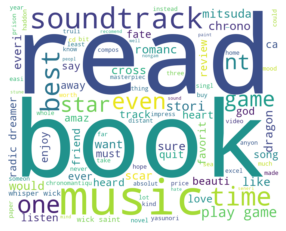

In [80]:
# Load in the dataframe
df= pd.read_csv('movie_game_review_data.csv',nrows=10)

# concatenate all text from text column into one single entry, it calculates word frequency on its own.
text =  [' '.join(df['clean_text'])][0]

# Create and generate a word cloud image:
wordcloud = WordCloud(height=800, width=1000, background_color='white',max_words=100,
    min_font_size=4,stopwords=stopwords_fr,).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Save the image in the img folder:
#wordcloud.to_file("img/first_review.png")



# Topic modeling

# Sklearn LDA 

In [21]:
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
import pandas as pd
import numpy as np

In [7]:
df= pd.read_csv('movie_game_review_data.csv',nrows=10)
df['text']=df.text.str.lower() # optional step to convert text to lower case

## stemming , lemmatization, punctuation removal , stopword removal , tokemization, lowercase
df['clean_text'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] )),axis=1)

text =  [' '.join(df['clean_text'])][0]

In [8]:
vectorizer = CountVectorizer(analyzer='word',       
                             min_df=1,
# minimum reqd occurences of a word 
                             stop_words='english',             
# remove stop words
                             lowercase=True,                   
# convert all words to lowercase
                             token_pattern='[a-zA-Z0-9]{3,}') 
# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized = vectorizer.fit_transform(df['clean_text'])

In [ ]:
# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=20,               # Number of topics
                                      max_iter=10,               
# Max learning iterations
                                      learning_method='online',   
                                      random_state=100,          
# Random state
                                      batch_size=128,            
# n docs in each learning iter
                                      evaluate_every = -1,       
# compute perplexity every n iters, default: Don't
                                      n_jobs = -1,               
# Use all available CPUs
                                     )
lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributesd

In [99]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
print(lda_model.get_params())

Log Likelihood:  -6730.926318836823
Perplexity:  1343725.6412659022
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 10.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 20,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [17]:
# Define Search Param
search_params = {'n_components': [10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}
# Init the Model
lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=0)
# Init Grid Search Class
model = GridSearchCV(lda, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)

GridSearchCV(estimator=LatentDirichletAllocation(learning_method='online',
                                                 learning_offset=50.0,
                                                 max_iter=5, random_state=0),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [10, 15, 20, 25, 30]})

In [19]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -2729.911643656171
Model Perplexity:  23467.949201369876


In [22]:
data= df.text
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'black'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.000000,0.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2
Doc1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980000,9
Doc2,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000,5
Doc3,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
Doc4,0.000000,0.000000,0.000000,0.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3
Doc5,0.000000,0.000000,0.000000,0.000000,0.000000,0.990000,0.000000,0.000000,0.000000,0.000000,5
Doc6,0.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Doc7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.980000,0.000000,0.000000,7
Doc8,0.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0
Doc9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.970000,0.000000,0.000000,0.000000,6


In [115]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()

,8th,absolut,actual,amaz,amazon,ancient,anoth,anyon,anyth,ask,...,worst,worth,writ,write,written,wrote,xenogear,yasunori,year,zelbessdisk
Topic0,1.126790,0.547568,0.622944,0.483142,1.031801,0.548080,1.069662,1.042068,0.549711,0.544320,...,1.113342,0.555096,1.017220,0.538824,1.087514,0.592842,0.668706,0.524718,0.481326,0.524531
Topic1,0.582442,0.517153,0.454558,0.457329,0.572207,0.596845,0.497451,0.536666,0.541917,0.616250,...,0.542152,0.548191,0.475587,0.511362,0.508380,0.533243,0.539190,0.537905,0.554485,0.446705
Topic2,0.482114,0.637280,0.491528,0.522807,0.538556,0.532884,0.508605,1.000214,0.480104,0.478360,...,0.482180,0.511755,0.501777,0.551293,0.516915,0.516563,0.495770,0.522808,0.569382,0.500670
Topic3,0.532953,0.537697,0.488610,0.590728,0.568302,1.039570,0.529726,0.523855,0.520581,1.133345,...,0.598232,0.535827,0.458823,0.451186,0.524391,1.001587,0.562574,1.087423,0.559585,1.060706
Topic4,0.562837,0.548679,0.442695,0.560578,0.523568,0.487200,0.529486,0.522803,0.564572,0.538334,...,0.497467,0.551193,0.526110,0.540744,0.481153,0.475462,0.540679,0.579573,0.519388,0.475762


# Visualization of topics through wordclouds

In [15]:
def plot_topics(topics):
    # 1. Wordcloud of Top N words in each topic
    from matplotlib import pyplot as plt
    from wordcloud import WordCloud, STOPWORDS
    import matplotlib.colors as mcolors

    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

    cloud = WordCloud(stopwords=stopwords_fr,
                      background_color='white',
                      width=2500,
                      height=1800,
                      max_words=10,
                      colormap='tab10',
                      color_func=lambda *args, **kwargs: cols[i],
                      prefer_horizontal=1.0)


    fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

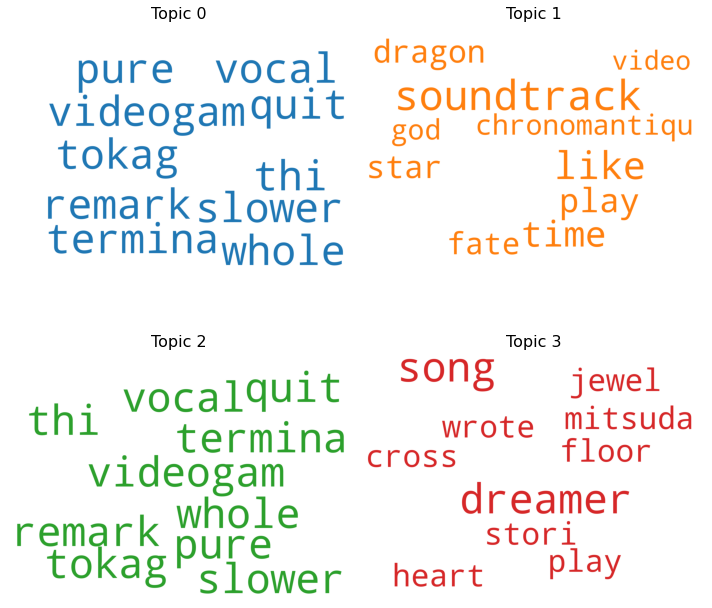

In [31]:
topics = lda_model.show_topics(formatted=False)
plot_topics(topics)

# Gensim LDA

In [ ]:
####### Topic modeling using LDA - gensim 
from gensim import corpora, models
df= pd.read_csv('movie_game_review_data.csv',nrows=10)
df['text']=df.text.str.lower() # optional step to convert text to lower case

## stemming , lemmatization, punctuation removal , stopword removal , tokemization, lowercase
df['clean_text'] = df.apply(lambda x: ' '.join(clean_texts(x['text'] )),axis=1)
### just tokenize the data
df['tokens']=df.apply(lambda x: clean_texts(x['clean_text'] , lemma=0, stem=0, punc_removal=0),axis=1)

list_of_list_of_tokens=list(df['tokens'])
#list_of_list_of_tokens = [["love","is","carefree"], ["who","doesnt","want","love"]]
# ["a","b","c"] are the tokens of document 1, ["d","e","f"] are the tokens of document 2...
dictionary_LDA = corpora.Dictionary(list_of_list_of_tokens)
dictionary_LDA.filter_extremes(no_below=0)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

num_topics = 20
%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                  id2word=dictionary_LDA, \
                                  passes=4, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary_LDA.keys()))

# for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
#     print(str(i)+": "+ topic)

#lda_model[corpus[0]] # corpus[0] means the first document.

# Visualizing topics through pyLDAvis

In [ ]:
%matplotlib inline
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

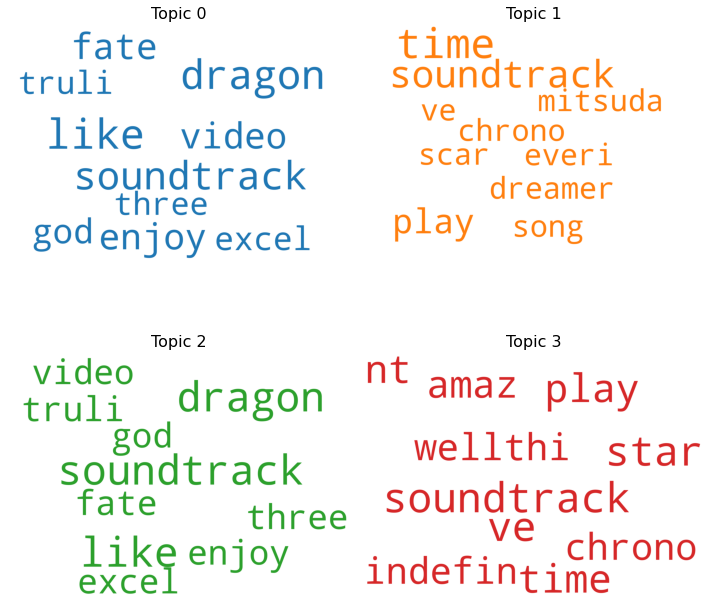

In [34]:
topics = lda_model.show_topics(formatted=False)
plot_topics(topics)

In [37]:
from gensim import corpora, models
####### Topic modeling using LSI - gensim 
NUM_TOPICS=6 
# Build the LSI model
# Build a Dictionary - association word to numeric id
dictionary = corpora.Dictionary(list_of_list_of_tokens)
 
# Transform the collection of texts to a numerical form
corpus = [dictionary_LSI.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]
lsi_model = models.LsiModel(corpus=corpus, num_topics=NUM_TOPICS, id2word=dictionary)
# for i,topic in lsi_model.show_topics(formatted=True, num_topics=num_topics, num_words=10):
#     print(str(i)+": "+ topic)

# lsi_model[corpus[0]] # corpus[0] means the first document.



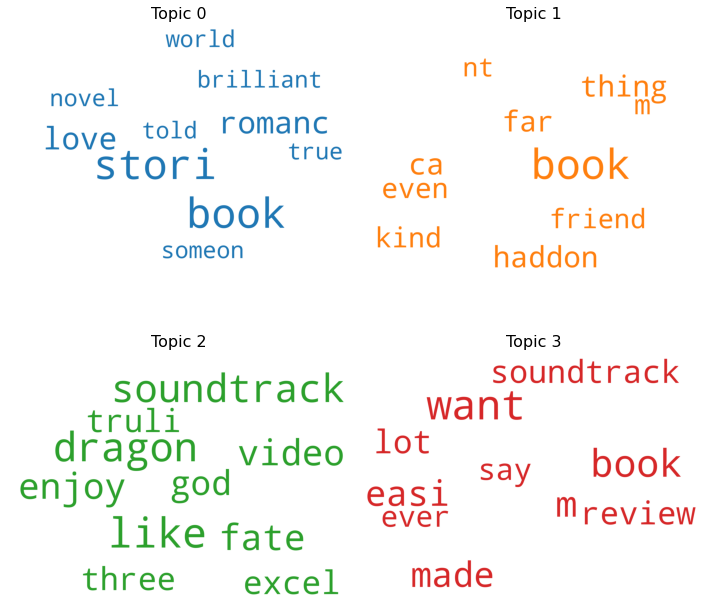

In [38]:
topics = lsi_model.show_topics(formatted=False)
plot_topics(topics)

# Visualizing topics through sentence chart

In [ ]:
import gensim
list_of_list_of_tokens=list(df['tokens'])
id2word = corpora.Dictionary(list_of_list_of_tokens)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in list_of_list_of_tokens]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

# print(lda_model.print_topics())

In [ ]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

# sentences_chart()   